<a href="https://colab.research.google.com/github/rishikaul22/Data-Science-Lab/blob/main/DS_exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 8

**Name:** Rishi Kaul

**UID:** 2018130019

**Objectives:**
Understanding Support Vector Machine algorithm through building SVM algorithm in Python

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [ ]:
%matplotlib inline

# We'll define a function to draw a nice plot of an SVM

def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
  
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)

  # Support vectors indicated in plot by vertical lines

  sv = svc.support_vectors_

  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max)

  plt.ylim(y_min, y_max) 
  plt.xlabel('X1')

  plt.ylabel('X2') 
  plt.show()

  print('Number of support vectors: ', svc.support_.size)

Generate a set of observations, which belong to two classes:

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Generating random data: 20 observations of 2 features and divide into tw

np.random.seed(5)

X = np.random.randn(20,2) 
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1] + 1

Text(0, 0.5, 'X2')

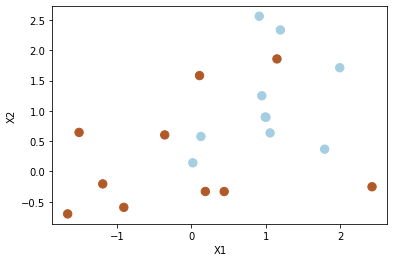

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

Plot the data to see whether the classes are linearly separable

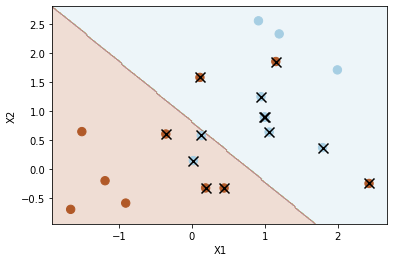

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

As we can see the data is not lineraly seperable.

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

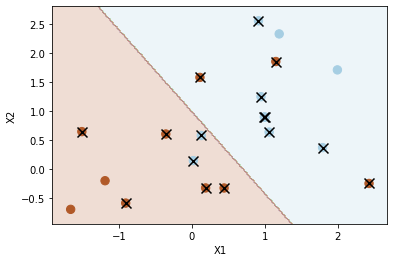

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)

plot_svc(svc2, X, y)

Plot the support vector classifier by calling the plot_svc() function on the output of the call to SVC(), as well as the data used in the call to SVC():

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Select the optimal C parameter by cross-validation

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]

clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring= 'accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

With the help of GridSearchCV, we can find the optimal parameters

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00090883, 0.00074615, 0.00055728, 0.00056684, 0.00058239,
        0.00062625, 0.00078599]),
 'mean_score_time': array([0.00052021, 0.00036488, 0.00031435, 0.00031855, 0.00032156,
        0.00034173, 0.00033975]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [ ]:
clf.best_params_

{'C': 0.001}

Generating test dataset

In [ ]:
np.random.seed(1)

X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)

X_test[y_test == 1] = X_test[y_test == 1] -1

Using cost value obtained from GridSearchCV results.

In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)

y_pred = svc2.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Pred -1','Pred +1'], index=['Actual -1', 'Actual +1'])

,Pred -1,Pred +1
Actual -1,2,6
Actual +1,0,12


As we can see from the results, the correct predictions are 14.

Now making modifications to make the data linearly seperable.

Text(0, 0.5, 'X2')

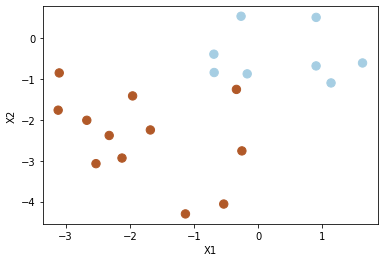

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

Plotting the linearly seperable dataset.

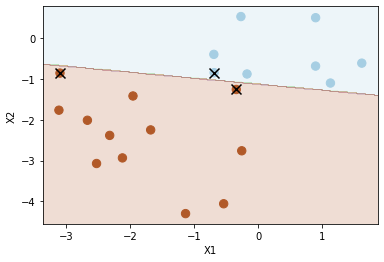

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear') 
svc3.fit(X_test, y_test) 
plot_svc(svc3, X_test, y_test)

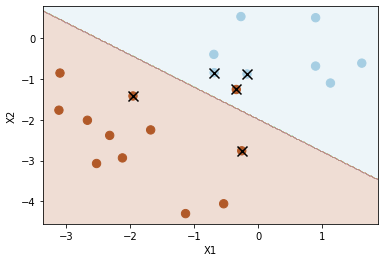

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test) 
plot_svc(svc4, X_test, y_test)

The first plot above show SVC with 3 support vectors. However, the margins are too close to each other and the variance is high. In the second plot with greater number of vectors, we can see that the seperation of data is much well defined as compared to the first plot.

Text(0, 0.5, 'X2')

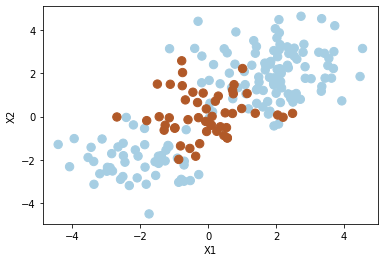

In [ ]:
from sklearn.model_selection import train_test_split 

np.random.seed(8)

X = np.random.randn(200,2)

X[:100] = X[:100] +2

X[101:150] = X[101:150] -2

y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')

plt.ylabel('X2')

Now generating new dataset that would not work with linear kernel.

Applying SVC wth rbf kernel.

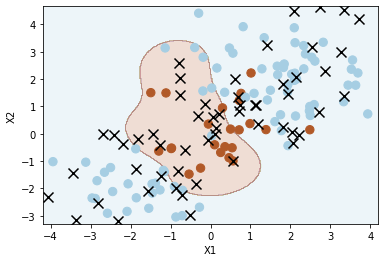

Number of support vectors:  59


In [ ]:
  svm = SVC(C=1.0, kernel='rbf', gamma=1)
  svm.fit(X_train, y_train)

  plot_svc(svm, X_test, y_test)

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy') 
clf.fit(X_train, y_train)

clf.best_params_

{'C': 1, 'gamma': 0.5}

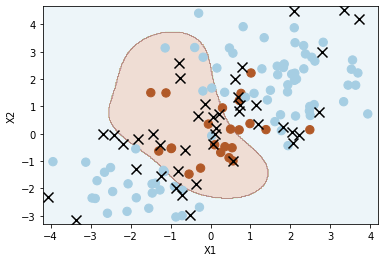

Number of support vectors:  46
[[71  6]
 [ 8 15]]
0.86


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'degree': [1,2,3,4]}]

clf = GridSearchCV(SVC(kernel='poly', probability=True), tuned_parameters, cv=10, scoring='accuracy') 
clf.fit(X_train, y_train)

clf.best_params_

{'C': 1, 'degree': 2}

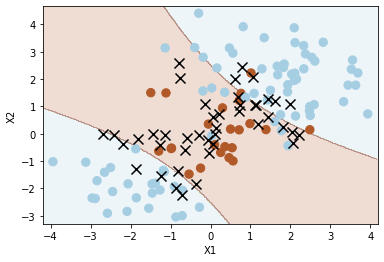

Number of support vectors:  43
[[66 11]
 [ 2 21]]
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test) 
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test))) 
print(clf.best_estimator_.score(X_test, y_test))

In [ ]:
!pip install scikit-plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


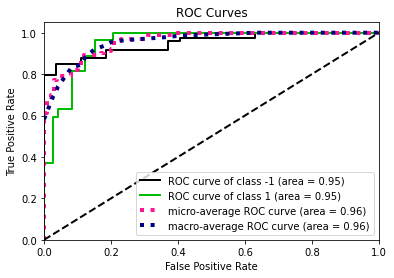

In [ ]:
import scikitplot as skplt

proba = clf.best_estimator_.predict_proba(X_train)
skplt.metrics.plot_roc_curve(y_train, proba)
plt.show()

**Conclusion**:

Through this experiment, I understood the concepts of support vector machines. I applied 3 types of kernels namely linear, poly, rbf. After analysing the results, I found that for data that is linearly seperable the linear kernel works best. The data that is not linearly seperable the polynomial kernel worked the best with an accuracy of 0.87. The kernels map the data into higher dimensional space and then applies linear svm. The reason why I used 2 features instead of 1 is because 1 feature cannot be linearly seperated, whereas 2 can be seperated in different planes. This same approach can be applied to larger features. Thus, with this approach we can make the data linearly seperable. 